# Plotting and Programming in Python (Continued)

## Plotting

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Position (km)')

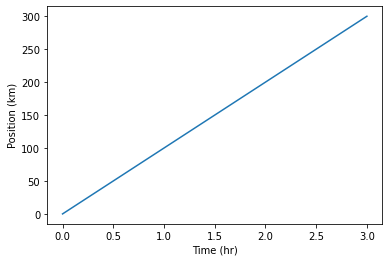

In [4]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')

## Plot direclty from Pandas DataFrame

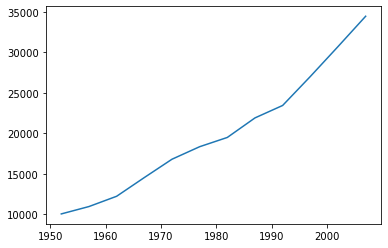

In [13]:
import pandas as pd

data = pd.read_csv('./gapminder_gdp_oceania.csv', 
                   index_col='country')


# so we want to keep the (year) part only for clarity when plotting GDP vs. years
# To do this we use strip(), which removes from the string the characters stated in the argument
# This method works on strings, so we call str before strip()
years = data.columns.str.strip('gdpPercap_')

# Convert year values to integers, saving results back to dataframe
data.columns = years.astype(int)  # note astype() --> casting function

data.loc['Australia'].plot()

Text(0.5, 1.0, 'Gdp per Bapita in Oceana')

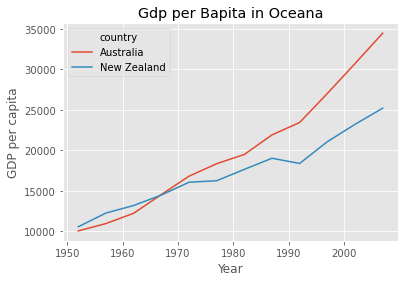

In [21]:
# More examples:

# GDP Per Capita 
data.T.plot()  # line by default
plt.ylabel('GDP per capita')
plt.xlabel('Year')
plt.title('Gdp per Bapita in Oceana')

Text(0, 0.5, 'GDP per capita')

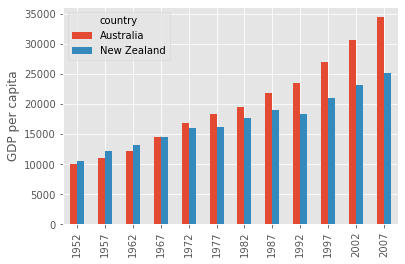

In [44]:
# MANY styles of plots are available
plt.style.use('ggplot')
data.T.plot(kind='bar')  # line, bar, barh, hist, box, area, pie, scatter, hexbin
plt.ylabel('GDP per capita')

Text(0.5, 0, 'Year')

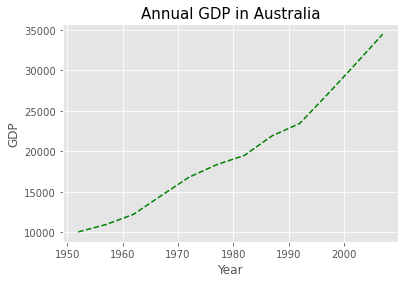

In [55]:
# Plotting data using the matplotlib.plot() function direclty
years = data.columns
gdp_australia = data.loc['Australia']

plt.plot(years, gdp_australia, 'g--')  # last flag determines color of line
plt.title('Annual GDP in Australia', fontsize=15)
plt.ylabel('GDP')
plt.xlabel('Year')

# Can plot many sets of data together

Text(0.5, 1.0, 'GDP per capita ($) in Oceana')

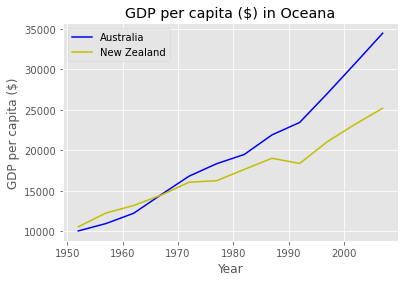

In [69]:
# Select two countries' worth of data.
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'y-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')  # location parameter
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')
plt.title('GDP per capita ($) in Oceana')

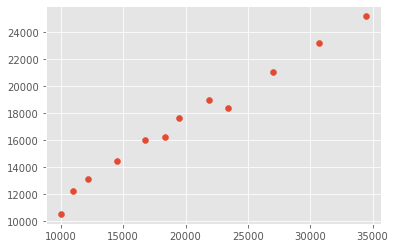

In [70]:
# Scatterplot examples:
plt.scatter(gdp_australia, gdp_nz)

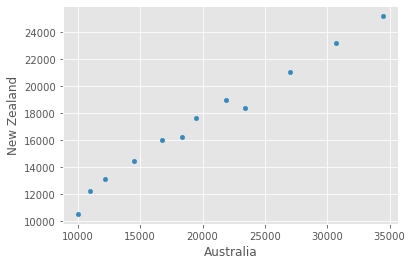

In [72]:
data.T.plot.scatter(x = 'Australia', y = 'New Zealand')  
# Transpose --> so country indices are now values

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

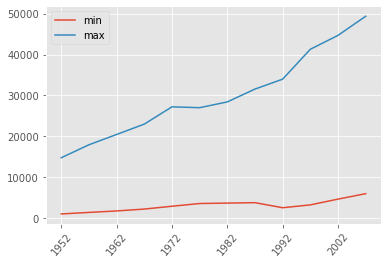

In [82]:
# Minima and Maxima
data_europe = pd.read_csv('./gapminder_gdp_europe.csv', index_col='country')

# Note: use of strip technique to clean up labels
years = data_europe.columns.str.strip('gdpPercap_')
data_europe.columns = years;
data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.legend(loc='best')
plt.xticks(rotation=50)  # rotate tick labels

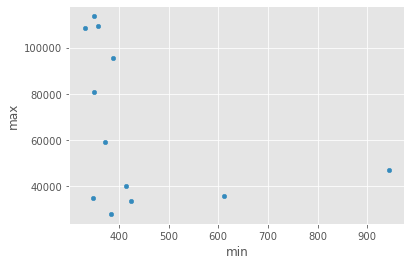

In [90]:
# Correlations
data_asia = pd.read_csv('./gapminder_gdp_asia.csv', index_col='country')
data_asia.describe().T.plot(kind='scatter', x='min', y='max')

1952          Kuwait
1957          Kuwait
1962          Kuwait
1967          Kuwait
1972          Kuwait
1977          Kuwait
1982    Saudi Arabia
1987          Kuwait
1992          Kuwait
1997          Kuwait
2002       Singapore
2007          Kuwait
dtype: object


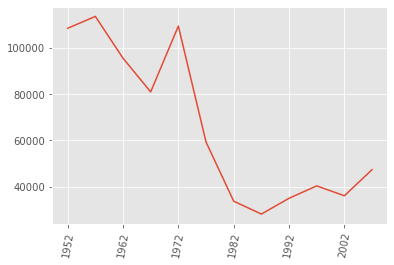

In [98]:
# Variability of Max is much higher than Min --> take a look at Max variable
data_asia = pd.read_csv('./gapminder_gdp_asia.csv', 
                        index_col='country')
years = data_asia.columns.str.strip('gdbPercapita_')
data_asia.columns = years

data_asia.max().plot()
plt.xticks(rotation=80)
print(data_asia.idxmax())  # Remember idxmax function (max value for each index)

Text(0.5, 1.0, 'Life Expectancy vs. GDP in 2007')

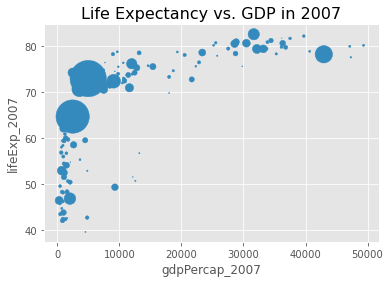

In [119]:
# More Correlations
# Create a plot showing correlation between GDP and life expectancy for 2007
data_all = pd.read_csv('./gapminder_all.csv', index_col='country')
data_all.plot(kind='scatter', x='gdpPercap_2007', y='lifeExp_2007',
              s=data_all['pop_2007']/1e6)  # change size of plotted points
plt.title('Life Expectancy vs. GDP in 2007', fontsize=16)

## Save your plot to a file

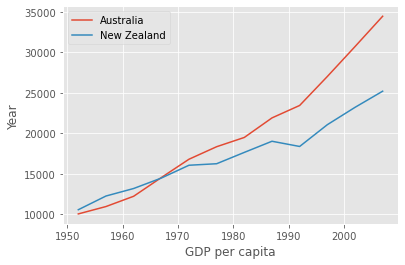

In [133]:
# fig = plt.gcf() --> get current figure

data.T.plot(kind='line')
# must get the current figure AFTER it has been plotted
fig = plt.gcf()  
plt.legend(loc='upper left')
plt.xlabel('GDP per capita')
plt.ylabel('Year')

fig.savefig('my_figure.png')